## Part 1. Quantitative Analysis of the Industry Sector

### Load the data

In [1]:
import pandas as pd
original_df = pd.read_csv('data/public_firms.csv', encoding = 'utf-8')
original_df.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
0,1004,1994,USA,AAR CORP,1988/01/01,5080,13.375,22.487,10.463,425.814,451.395,0.024572
1,1004,1995,USA,AAR CORP,1988/01/01,5080,22.000,33.606,16.012,437.846,504.990,0.036570
2,1004,1996,USA,AAR CORP,1988/01/01,5080,30.250,51.705,23.025,529.584,589.328,0.043478
3,1004,1997,USA,AAR CORP,1988/01/01,5080,38.750,17.222,35.657,670.559,782.123,0.053175
4,1004,1998,USA,AAR CORP,1988/01/01,5080,23.875,8.250,41.671,726.630,918.036,0.057348


### A. Data Filtering

In [2]:
# Filter out companies in the selected business group
df = original_df[original_df['sic'].astype(str).str.startswith('23')]
df.head()

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
1118,1278,1995,USA,SUNBEAM CORPORATION,NaN,2390,15.2500,28.273,50.511,1158.684,1202.520,0.043593
1119,1278,1996,USA,SUNBEAM CORPORATION,NaN,2390,25.5000,11.526,-228.262,1072.709,984.236,-0.212790
1120,1278,1997,USA,SUNBEAM CORPORATION,NaN,2390,42.2500,52.298,38.301,1058.928,1073.090,0.036170
1121,1278,1998,USA,SUNBEAM CORPORATION,NaN,2390,6.8750,61.432,-897.923,3405.517,1836.871,-0.263667
1122,1278,1999,USA,SUNBEAM CORPORATION,NaN,2390,4.1875,40.799,-299.519,3132.349,2397.979,-0.095621


In [3]:
# a. How many unique firm-year ("fyear") observations are there in the filtered dataset?
print(df['fyear'].nunique())


27


In [4]:
# b. How many unique firms are there in the filtered dataset?
print(df['conm'].nunique())

133


In [5]:
# c. How many firms in the filtered dataset have records over all 27 years (1994-2020)?

# Group by company and count the number of years in which the company has a record
group = df.groupby('conm')['fyear'].nunique()

# Filter and extract companies that have records over all 27 years
com_27_years = group[group == 27]
print('Number of firms that have records over all 27 years: ' + str(len(com_27_years)))

Number of firms that have records over all 27 years: 4


### B. Preliminary Analysis

In [6]:
# 1. What are the top 10 firms with the highest stock price (column "prcc_c") in the year 2020?
highest_stock_price = df[df['fyear'] == 2020].sort_values(by = 'prcc_c', ascending = False)[:10]
highest_stock_price[['conm', 'prcc_c','fyear']]

,conm,prcc_c,fyear
194398,LULULEMON ATHLETICA INC,348.030,2020
40107,UNIFIRST CORP,211.690,2020
56233,LVMH MOET HENNESSY LOUIS V,125.023,2020
138806,RALPH LAUREN CORP,103.740,2020
47867,WACOAL HOLDINGS CORP,100.538,2020
177364,CARTER'S INC,94.070,2020
31373,PVH CORP,93.890,2020
149123,COLUMBIA SPORTSWEAR CO,87.380,2020
41136,VF CORP,85.410,2020
29751,OXFORD INDUSTRIES INC,65.510,2020


In [7]:
# 2. What are the top 10 firms with the highest sales (column "sale") in the entire history of the dataset?
highest_sales = df.sort_values(by = 'sale', ascending = False).drop_duplicates(subset='conm')[:10]
highest_sales[['conm', 'sale']]

,conm,sale
56232,LVMH MOET HENNESSY LOUIS V,60227.544
41134,VF CORP,13848.660
31372,PVH CORP,9909.000
138800,RALPH LAUREN CORP,7620.000
61835,LEVI STRAUSS & CO,7164.632
190849,HANESBRANDS INC,6966.923
204536,CAPRI HOLDINGS LTD,5551.000
186910,UNDER ARMOUR INC,5267.132
81311,JONES GROUP INC,5074.200
23199,KATE SPADE & CO,4994.318


In [8]:
# 3. What is the geographical distribution (column "location") of all the firms? 
# In other words, how many firms are there in each location? Please list the top 10 locations.
# location = df.groupby('location').size().sort_values(ascending = False)[:10]
location = df.drop_duplicates(subset = ['location','conm']).groupby('location').size().sort_values(ascending = False)[:10]
location

location
USA    115
CHN      4
CAN      3
ISR      3
GBR      2
AUS      1
FRA      1
HKG      1
ITA      1
JPN      1
dtype: int64

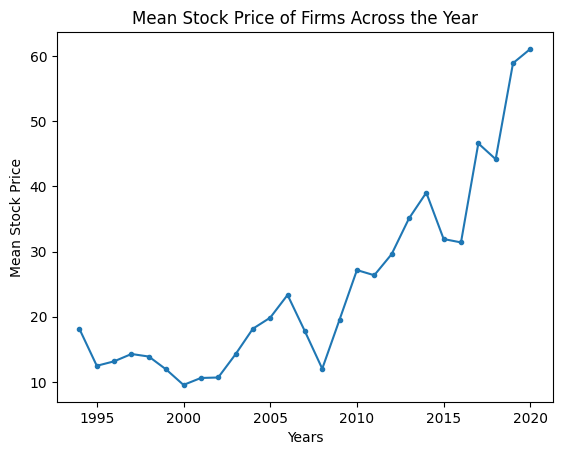

In [9]:
# 4. Create a line chart to show the average stock price (column "prcc_c") in the selected sector(s)
# across the years. If you have selected multiple sectors, draw multiple lines to show them separately

mean_yearly_stock_price = df.groupby('fyear')['prcc_c'].mean()

import matplotlib.pyplot as plt

mean_yearly_stock_price.plot(kind='line', marker='.')
plt.title('Mean Stock Price of Firms Across the Year')
plt.xlabel('Years')
plt.ylabel('Mean Stock Price')
plt.show()

In [10]:
# 5. Which firm was affected the most by the 2008 Financial Crisis, as measured by the percentage
# drop in stock price from 2007 to 2008?

pivot_df = df.pivot_table(index='conm', columns='fyear', values='prcc_c')
pivot_df['percentage_drop'] = ((pivot_df[2008] - pivot_df[2007]) / pivot_df[2007]) * 100
result = pivot_df.sort_values(by = 'percentage_drop').index[0]
print(result)

INCA DESIGNS INC


#### Citation:
- Source: GPT-4
- Prompt: "Suppose that there is a dataset, each observation is a company. The same company can have several records over different years, and 'year' is one of the column. "stock_price" is another column. How to check each firm's percentage drop in stock price from 2007 to 2008?"
- Result:

To calculate each firm's percentage drop in stock price from 2007 to 2008, follow these steps:

1. Filter the data for the years 2007 and 2008.
2. Use the pivot or pivot_table function to reshape the data so that firms are in the rows, years are in the columns, and stock prices are the values.
3. Calculate the percentage drop for each firm.

Here's a step-by-step example using a hypothetical dataset:

`import pandas as pd`

`data = {
    'firm': ['A', 'A', 'B', 'B', 'C', 'C'],
    'year': [2007, 2008, 2007, 2008, 2007, 2008],
    'stock_price': [100, 90, 150, 100, 200, 150]
}`
`df = pd.DataFrame(data)`

`pivot_df = df.pivot_table(index='firm', columns='year', values='stock_price')`

`pivot_df['percentage_drop'] = ((pivot_df[2008] - pivot_df[2007]) / pivot_df[2007]) * 100`

`result = pivot_df[['percentage_drop']]`

`print(result)`

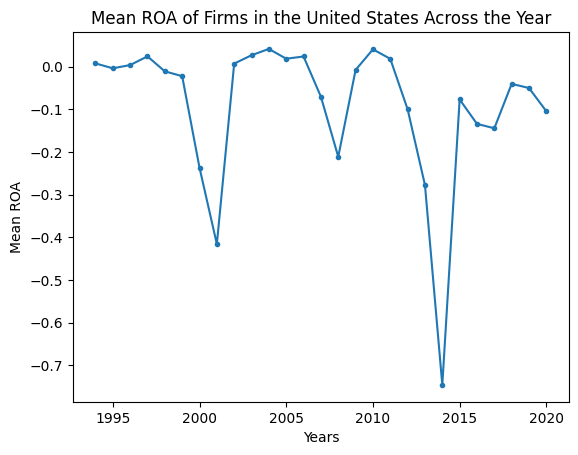

In [11]:
# 6. Plot the average Return on Assets (ROA) for the firms located in the “USA” across the years.
# ROA is calculated as ni/asset

# Make a copy of df in order not to change the original dataframe
USA_firms = df.copy()

# Filter and extract firms located in the USA
USA_firms = USA_firms[USA_firms['location'] == 'USA']

# Add a column 'roa' to the new df, and calculate the ROA value by ni/asset of each row
USA_firms['roa'] = USA_firms['ni'] / USA_firms['asset']

# First group the USA_firms by years, then calculate the mean ROA for each year
mean_yearly_roa = USA_firms.groupby('fyear')['roa'].mean()

# Plot the line chart directly on the grouped pandas series
mean_yearly_roa.plot(kind = 'line', marker = '.')
plt.title('Mean ROA of Firms in the United States Across the Year')
plt.xlabel('Years')
plt.ylabel('Mean ROA')
plt.show()

## Part 2. Text Analysis on the Industry Sector

In [12]:
df_10K = pd.read_csv("data/2020_10K_item1_full.csv", encoding = 'utf-8')
df_10K.head()

,cik,year,name,item_1_text,gvkey
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614


### C. Text Cleaning

In [13]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aizenz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# 1. Convert all words to lowercase.
# 2. Remove punctuations
# 3. Remove stop words based on the list of English stop words in NLTK

translator = str.maketrans('', '', string.punctuation)
sw = stopwords.words('english')

def clean_text(text):
    # Lower case
    clean_text = text.lower()

    # Remove punctuation
    clean_text = clean_text.translate(translator)

    # Remove stopwords
    clean_words = [w for w in clean_text.split() if w not in sw]
    
    return ' '.join(clean_words)

df_10K['item_1_clean'] = df_10K['item_1_text'].apply(clean_text)
df_10K.head()

,cik,year,name,item_1_text,gvkey,item_1_clean
0,1041588,2020,ACCESS-POWER INC,fixed expenses are previosuly documented in an...,66119,fixed expenses previosuly documented 8k 235000...
1,315374,2020,HURCO COMPANIES INC,"General Hurco Companies, Inc. is an internatio...",5788,general hurco companies inc international indu...
2,1622996,2020,"ACRO BIOMEDICAL CO., LTD.",We have been engaged in the business of develo...,27584,engaged business developing marketing products...
3,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun capital group formerly ...
4,1191334,2020,Chun Can Capital Group,CORPORATE HISTORY Chun Can Capital Group (form...,153614,corporate history chun capital group formerly ...


### D. Keyword Analysis

In [54]:
# 1. Create a new DataFrame that includes only firms in your selected industry sectors. Ensure that
# you merge the 10-K data with the previous "public_firm.csv" data using an inner join.

merged_df = pd.merge(df.loc[df['fyear']==2020], df_10K, on='gvkey', how='inner')


In [55]:
# 2. Generate the top 10 keywords for each firm based on two different methods: word counts and TF-IDF score.

# Using word counts
from collections import Counter

def get_keywords_wc(text):
    c = Counter(text.split())
    words = []
    for pair in c.most_common(10):
        words.append(pair[0])
    return ' '.join(words)

merged_df['keyword_clean_wc'] = merged_df['item_1_clean'].apply(get_keywords_wc)



In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
def get_keywords_tfidf(document_list):
    '''
    Input: A list of documents (text)
    Output: The corresponding top 10 keywords for each document based on tf-idf values
    '''

    # Step 1: Create the TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Step 2: Calculate the TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(document_list)

    # Step 3: Get feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Step 4: Extract top 10 keywords for each text
    top_keywords = []
    for i in range(len(document_list)):

        if i %100 == 0:
            print(f'Processing the {i}/{len(document_list)} document.')
        
        feature_index = tfidf_matrix[i, :].nonzero()[1]
        tfidf_scores = zip(feature_index, [tfidf_matrix[i, x] for x in feature_index])
        sorted_tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
        top_keywords.append(' '.join([feature_names[i] for i, _ in sorted_tfidf_scores[:10]]))
    
    return top_keywords

In [57]:
keywords = get_keywords_tfidf(merged_df['item_1_clean'].tolist())

Processing the 0/21 document.


In [58]:
merged_df['keyword_clean_tfidf'] =  keywords

In [59]:
# 3. Create two wordclouds to visualize the keywords across all firms in the selected sector: 
# one based on the word count of keywords and another based on the TF-IDF score

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [61]:
# Wordcloud based on word count results

# prepare text
text_wc = ' '.join(merged_df['keyword_clean_wc'].tolist())

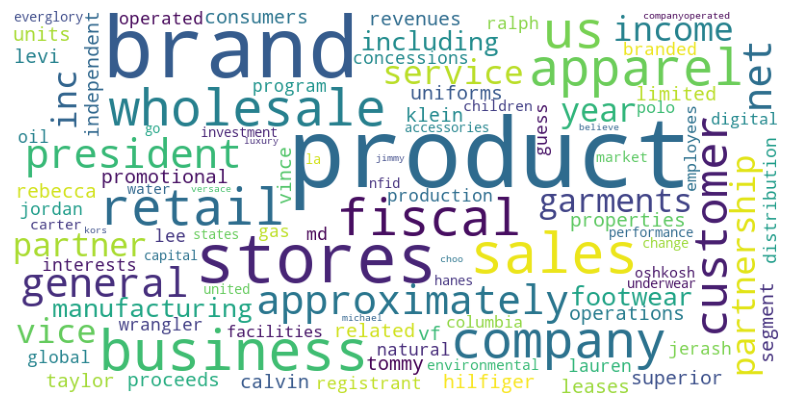

In [62]:
wordcloud1 = WordCloud(width=800, height=400, max_font_size= 100, background_color='white').generate(text_wc) # note that text is a string, not a list

plt.figure(figsize=(10,5))
plt.imshow(wordcloud1)
#plt.savefig('keyword_wc.png') # save as PNG file
plt.axis('off')

plt.show()

In [63]:
# Wordcloud based on TF-IDF results

# prepare text
text_tfidf = ' '.join(merged_df['keyword_clean_tfidf'].tolist())

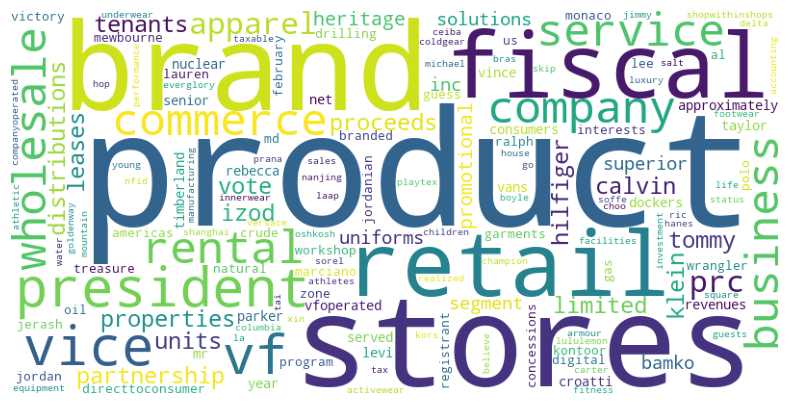

In [64]:
wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(text_tfidf) # note that text is a string, not a list

plt.figure(figsize=(10,5))
plt.imshow(wordcloud2)
#plt.savefig('keyword_tfidf.png') # save as PNG file
plt.axis('off')

plt.show()

### E. Word Embedding

Train a word2vec model and analyze word similarities

In [65]:
# 1. Train a word2vec model with the full 10-K sample

from gensim.models import Word2Vec

sent = [row.split() for row in merged_df['item_1_clean']]


In [66]:
model = Word2Vec(sent, min_count=1, vector_size=50, \
                 workers=3, window=3, sg = 1)

In [67]:
# Saving and loading models
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")

In [84]:
# 2. Manually inspect the wordclouds you generated in D.3 and choose three representative
# keywords that are relevant to the industry sector of your interest. Utilize the trained word2vec
# model to find the most relevant five words for each of these three keywords.

model.wv.most_similar('brand')[:5]

[('leading', 0.9698659181594849),
 ('broad', 0.9637725353240967),
 ('lifestyle', 0.9608046412467957),
 ('guess', 0.9562478065490723),
 ('range', 0.9557353258132935)]

In [85]:
model.wv.most_similar('product')[:5]

[('design', 0.9593449234962463),
 ('offerings', 0.9549767374992371),
 ('quality', 0.9498125910758972),
 ('categories', 0.941880464553833),
 ('development', 0.9314755201339722)]

In [86]:
model.wv.most_similar('stores')[:5]

[('store', 0.9501146674156189),
 ('companyoperated', 0.9497177600860596),
 ('department', 0.9494169354438782),
 ('operated', 0.9453827738761902),
 ('retail', 0.9439079761505127)]

## Part 3. Comprehensive Analysis of One Sample Firm

In [87]:
# 1. Convert the keywords extracted in D.2 into word embeddings with the word2vec model trained in E.1. 
# Add up the embeddings for each firm to create the firm-level embeddings. 
# Use the firm-level embeddings to find the focal firm’s competing firms (or, most similar firms)

In [88]:
from DocumentSimilarity import DocumentSimilarity

In [89]:
# Create an instance
d = DocumentSimilarity(model = model, gvkeys=merged_df['gvkey'], \
                       conm = merged_df['conm'], 
                       keywordslist = merged_df['keyword_clean_tfidf'])

In [90]:
# The firm's embedding based on word2vec vectors
# We choose LULULEMON to analyze

d.get_firm_embedding(firm = 178015)

array([ 0.06204973,  0.07582857,  0.08622456, -0.03550885,  0.10119466,
       -0.1209235 , -0.08823244,  0.22553656, -0.32114965, -0.01915873,
       -0.02365295, -0.1475752 , -0.02020512,  0.05435038,  0.01726446,
        0.07496607, -0.01553066, -0.01937089, -0.25999367, -0.17454685,
        0.04382862, -0.00847856,  0.27636352, -0.08768292,  0.06918009,
        0.01711871, -0.00043163, -0.1111813 , -0.17050803,  0.08069829,
        0.10935263, -0.05852108, -0.03329961,  0.18173438, -0.11000881,
        0.1694026 ,  0.15114239,  0.17392643,  0.08049513, -0.1484574 ,
        0.17396958,  0.07503483, -0.08488841,  0.09274035,  0.22290397,
        0.05004488,  0.04211264, -0.14145938,  0.19156972,  0.04317261],
      dtype=float32)

In [92]:
# Extract the top 5 competitors of LULULEMON

list(set(d.most_similar(firm = 178015, topn = 10)))

[(175319, 'HANESBRANDS INC', 0.96285605),
 (10198, 'SUPERIOR GROUP OF COS INC', 0.9799484),
 (63447, 'GUESS INC', 0.96998507),
 (19402, 'G-III APPAREL GROUP LTD', 0.9652986),
 (150278, "CARTER'S INC", 0.9654559),
 (33476, 'JERASH HOLDINGS (US)', 0.9638237),
 (8219, 'OXFORD INDUSTRIES INC', 0.98043716),
 (137432, 'DELTA APPAREL INC', 0.972972),
 (19175, 'VINCE HOLDING CORP', 0.9834035),
 (35035, 'KONTOOR BRANDS INC', 0.98456025)]

In [96]:
# Records of LULULEMON ATHLETICA INC across all years

dflulu = df[df['gvkey'] == 178015]

In [77]:
# Record of LULULEMON ATHLETICA INC in 2020

merged_df[(merged_df['gvkey'] == 178015) & (merged_df['fyear'] == 2020)]

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,cik,year,name,item_1_text,item_1_clean,keyword_clean_wc,keyword_clean_tfidf
19,178015,2020,CAN,LULULEMON ATHLETICA INC,2007/07/27,2300,348.03,1150.517,588.913,4185.215,4401.879,0.140713,1397187,2020,lululemon athletica inc.,General lululemon athletica inc. is principall...,general lululemon athletica inc principally de...,stores companyoperated fiscal products 2019 be...,companyoperated stores lululemon fiscal produc...


In [78]:
# Record of LEVI STRAUSS & CO in 2020

merged_df[(merged_df['gvkey'] == 16476) & (merged_df['fyear'] == 2020)]

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,cik,year,name,item_1_text,item_1_clean,keyword_clean_wc,keyword_clean_tfidf
5,16476,2020,USA,LEVI STRAUSS & CO,NaN,2300,20.08,1497.155,-127.141,5641.241,4452.609,-0.022538,94845,2020,LEVI STRAUSS & CO,Overview From our California Gold Rush beginni...,overview california gold rush beginnings grown...,fiscal products year 2019 net stores levi reve...,levi fiscal revenues year products stores net ...


In [79]:
# Record of VF CORP in 2020

merged_df[(merged_df['gvkey'] == 11060) & (merged_df['fyear'] == 2020)]

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,cik,year,name,item_1_text,item_1_clean,keyword_clean_wc,keyword_clean_tfidf
4,11060,2020,USA,VF CORP,NaN,2300,85.41,815.75,407.869,13754.029,9238.83,0.029655,103379,2020,V F CORP,"V.F. Corporation, founded in 1899, is one of t...",vf corporation founded 1899 one world largest ...,vf stores products brand president brands 2020...,vf president stores products brand vfoperated ...


In [80]:
# Record of GUESS INC in 2020

merged_df[(merged_df['gvkey'] == 63447) & (merged_df['fyear'] == 2020)]

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,cik,year,name,item_1_text,item_1_clean,keyword_clean_wc,keyword_clean_tfidf
10,63447,2020,USA,GUESS INC,1996/08/07,2330,22.62,469.11,-81.229,2465.868,1802.533,-0.032941,912463,2020,GUESS INC,General Unless the context indicates otherwise...,general unless context indicates otherwise ter...,stores guess products retail wholesale us 2020...,guess stores concessions retail wholesale prod...


In [81]:
# Recoed of DELTA APPAREL INC in 2020

merged_df[(merged_df['gvkey'] == 137432) & (merged_df['fyear'] == 2020)]

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,cik,year,name,item_1_text,item_1_clean,keyword_clean_wc,keyword_clean_tfidf
13,137432,2020,USA,DELTA APPAREL INC,2000/06/30,2300,20.07,16.458,-10.577,420.231,381.535,-0.025169,1101396,2020,"DELTA APPAREL, INC","Overview Delta Apparel, Inc. (collectively wit...",overview delta apparel inc collectively dtg2go...,products manufacturing facilities apparel fisc...,delta salt soffe manufacturing products facili...


In [82]:
# Record of VINCE HOLDING CORP in 2020

merged_df[(merged_df['gvkey'] == 19175) & (merged_df['fyear'] == 2020)]

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,cik,year,name,item_1_text,item_1_clean,keyword_clean_wc,keyword_clean_tfidf
6,19175,2020,USA,VINCE HOLDING CORP,2013/11/22,2300,6.36,NaN,-65.649,332.944,219.87,-0.197177,1579157,2020,VINCE HOLDING CORP.,For purposes of this Annual Report on Form 10-...,purposes annual report form 10k company us ref...,business vince fiscal stores wholesale rebecca...,vince taylor rebecca parker fiscal wholesale s...


In [97]:
merged_df['keyword_clean_wc']

0     partnership properties limited leases net gene...
1     brands hilfiger klein tommy calvin products br...
2     products segment superior promotional company ...
3     service president company vice customers servi...
4     vf stores products brand president brands 2020...
5     fiscal products year 2019 net stores levi reve...
6     business vince fiscal stores wholesale rebecca...
7     registrant gas oil md program partner interest...
8     jordan garments jerash 2020 approximately prod...
9     products brands product stores us branded glob...
10    stores guess products retail wholesale us 2020...
11    lauren ralph stores products business digital ...
12    products president vice company wholesale cust...
13    products manufacturing facilities apparel fisc...
14    products brand retail carter stores us market ...
15    products apparel footwear brand performance pr...
16    go everglory la business customers apparel ret...
17    company investment nfid brand 2018 busines